<a href="https://colab.research.google.com/github/Joojina/project_final/blob/master/imdb_genres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to analyze:
1. 어떤 장르가 제일 인기 있는지
2. 가장 수익을 높이 올린 장르는
3. 국가별 장르 인기 순위
4. 세대별(90/00/10) 장르 인기 순위
5. 장르별 평균 duration


## Some insights

1. 영화 평균 러닝타임 약 107분
2. 가장 긴 영화는 "Carlos" 5시간 38분
3. 가장 인기있는 영화는 "Wonder Woman" 과 "Beauty and the Beast"
4. 예산이 가장 많은 영화는 "Pirates of the Caribbean: On Stranger"
5. 가장 큰 영화 제작자는 Warner Bros와 Universal Pictures
 (유일하게 수익을 창출하는 영화사임)
6. 가장 인기 있는 장르는 Drama, Comedy 

# 데이터 로드
- 74551개의 imdb 자료


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [0]:
df=pd.read_csv("/gdrive/My Drive/Colab Notebooks/imdb_movies.csv", error_bad_lines=False, encoding='CP949')

# 항목
###원천데이터 항목 목록

imdb_title_id,	title,	original_title,	year,	date_published,	genre,	duration,	country,	language,	director,	writer,	production_company,	actors,	description,	avg_vote,	votes,	budget,	usa_gross_income,	worlwide_gross_income,	metascore,	reviews_from_users,	reviews_from_critics

### 사용할 컬럼
movie_title(제목), title_year(개봉년), gene(90/00/10년 세대별), genres(장르), budget(예산), country(국가별), language(언어), income(수익)


In [5]:
df.isnull().sum(axis=1) # 74551개의 imdb 자료

0        0
1        0
2        0
3        0
4        0
        ..
74546    6
74547    6
74548    5
74549    8
74550    6
Length: 74551, dtype: int64

In [6]:
df.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-25,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",After the devastating events of,8.5,602792,356000000.0,858373000.0,2.797801e+09,78.0,8302.0,531.0


In [0]:
# 사용할 칼럼 ['title', 'original_title', 'year', 'genre', 'country', 'language', 'budget', 'usa_gross_income', 'worlwide_gross_income']
# title(제목), year(개봉년), gene(90/00/10년 세대별), genres(장르), budget(예산), country(국가별), language(언어), income(수익)

In [0]:
df.rename(columns={'title':'제목','year':'개봉년','genre':'장르','country':'국가', 'language':'언어','budget':'예산','usa_gross_income':'수익1-USA','worlwide_gross_income':'수익2-WW'}, inplace=True)

In [8]:
df.isnull().sum(axis=0)

imdb_title_id               0
제목                          0
original_title              0
개봉년                         0
date_published              0
장르                          0
duration                    0
국가                         39
언어                        717
director                   73
writer                   1360
production_company       4095
actors                     62
description              2187
avg_vote                    0
votes                       0
예산                      58403
수익1-USA                 60297
수익2-WW                  48287
metascore               62575
reviews_from_users       6265
reviews_from_critics    10000
dtype: int64

In [0]:
df.drop(0, inplace=True)

In [0]:
df.drop(['imdb_title_id','original_title','date_published','duration','director','writer','production_company','actors','description','avg_vote','votes','metascore','reviews_from_users','reviews_from_critics'], axis=1, inplace=True)

In [11]:
df.isnull().sum(axis=0)

제목             0
개봉년            0
장르             0
국가            39
언어           717
예산         58403
수익1-USA    60297
수익2-WW     48287
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74550 entries, 1 to 74550
Data columns (total 8 columns):
제목         74550 non-null object
개봉년        74550 non-null int64
장르         74550 non-null object
국가         74511 non-null object
언어         73833 non-null object
예산         16147 non-null float64
수익1-USA    14253 non-null float64
수익2-WW     26263 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ MB


In [0]:
df.fillna('0', inplace=True)

In [0]:
df.drop(['imdb_title_id'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 8 columns):
제목         81273 non-null object
개봉년        81273 non-null int64
장르         81273 non-null object
국가         81273 non-null object
언어         81273 non-null object
예산         81273 non-null object
수익1-USA    81273 non-null object
수익2-WW     81273 non-null object
dtypes: int64(1), object(7)
memory usage: 5.0+ MB


In [13]:
df.head(1)

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",237000000.0,760507625.0,2.789968e+09


In [0]:
df['예산'] = pd.to_numeric(df['예산'])
df['수익1-USA'] = pd.to_numeric(df['수익1-USA'])
df['수익2-WW'] = pd.to_numeric(df['수익2-WW'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74550 entries, 1 to 74550
Data columns (total 8 columns):
제목         74550 non-null object
개봉년        74550 non-null int64
장르         74550 non-null object
국가         74511 non-null object
언어         73833 non-null object
예산         16147 non-null float64
수익1-USA    14253 non-null float64
수익2-WW     26263 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ MB


In [0]:
df['예산_국가별'] = df.예산.str.split(' ').str[:]

In [0]:
df.head(10)


,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,예산_국가별
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,0,2250,0,0,"[2250, ]"
1,Den sorte dr첩m,1911,Drama,"Germany, Denmark",0,0,0,0,[0]
2,Cleopatra,1912,"Drama, History",USA,English,45000,0,0,"[45000, ]"
3,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,Italian,0,0,0,[0]
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,English,0,0,0,[0]
5,Madame DuBarry,1919,"Biography, Drama, Romance",Germany,German,0,0,0,[0]
6,Quo Vadis?,1913,"Drama, History",Italy,Italian,ITL 45000,0,0,"[ITL, 45000]"
7,Independenta Romaniei,1912,"History, War",Romania,0,ROL 400000,0,0,"[ROL, 400000]"
8,Richard III,1912,Drama,"France, USA",English,30000,0,0,"[30000, ]"
9,Atlantis,1913,Drama,Denmark,Danish,0,0,0,[0]


In [19]:
df['예산']=df['예산'].apply(lambda x: float(x.replace(',','')))
df['수익1-USA']=df['수익1-USA'].apply(lambda x: int(x.replace(',','')))
df['수익2-WW']=df['수익2-WW'].apply(lambda x: int(x.replace(',','')))


AttributeError: ignored

In [0]:
# 국가별 수익 상위 10개국

In [20]:
df.groupby('국가')['수익2-WW'].sum().sort_values(ascending=False)[:10]

국가
USA               3.615810e+11
UK, USA           2.509244e+10
USA, UK           2.403330e+10
China             1.532244e+10
Japan             1.334460e+10
USA, Canada       1.179732e+10
USA, Germany      1.077379e+10
South Korea       8.093308e+09
USA, Australia    7.767238e+09
Germany, USA      5.219577e+09
Name: 수익2-WW, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)


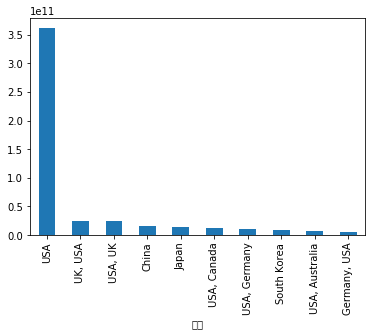

In [21]:
df.groupby('국가')['수익2-WW'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

In [0]:
# 국가별 개봉영화 갯수 상위 10개국 - bar chart

In [0]:
df.groupby('국가')['개봉년'].count().sort_values(ascending=False)[:10],\
plot(kind='bar')

In [0]:
# 장르별 수익 합계

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


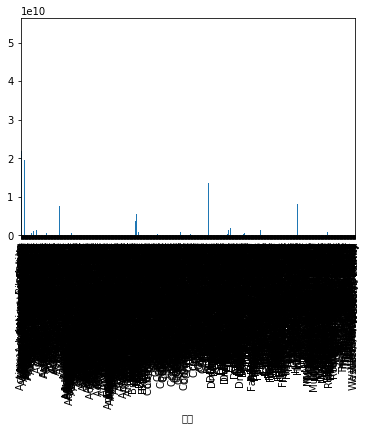

In [25]:
df.groupby('장르')['수익2-WW'].sum().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


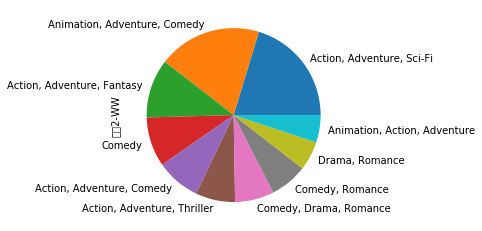

In [30]:
df.groupby('장르')['수익2-WW'].sum().sort_values(ascending=False)[:10].plot(kind='pie')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


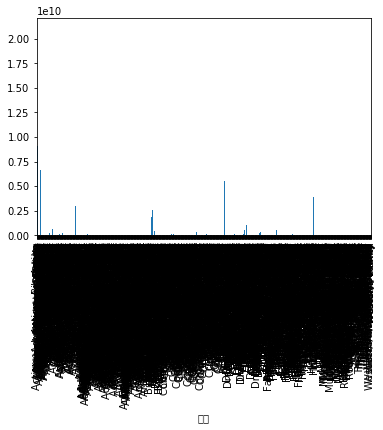

In [26]:
df.groupby('장르')['수익1-USA'].sum().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


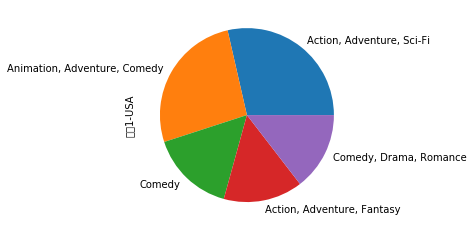

In [32]:
df.groupby('장르')['수익1-USA'].sum().sort_values(ascending=False)[:5].plot(kind='pie')
plt.show()

In [0]:
# 장르별 수익성

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


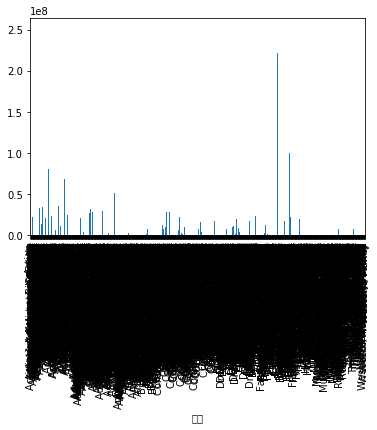

In [27]:
df.groupby('장르')['수익1-USA'].mean().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)


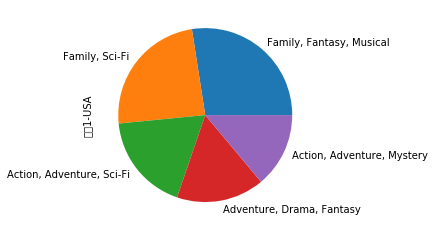

In [34]:
df.groupby('장르')['수익1-USA'].mean().sort_values(ascending=False)[:5].plot(kind='pie')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


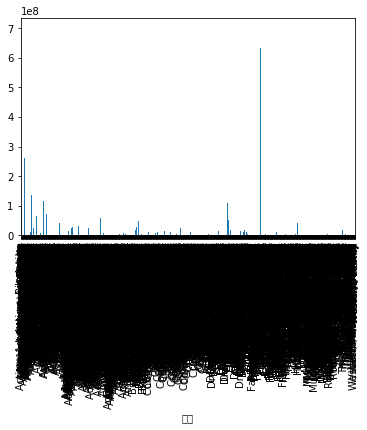

In [28]:
df.groupby('장르')['수익2-WW'].mean().plot(kind='bar')

# 장르1만 추출해서 분석해봄
1. 예산을 가장 많이 쓴 장르는?
2. 미국에서 수익성이 가장 좋은 장르는?
3. 전세계에서 가장 수익을 많이 올린 장르는?

In [0]:
df['장르_1'] = df.장르.str.split(',').str[0]

In [50]:
df.head(10)

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,장르_1,국가_1,언어_1
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",237000000.0,760507625.0,2.789968e+09,Action,USA,English
2,Titanic,1997,"Drama, Romance",USA,"English, Swedish, Italian",200000000.0,659363944.0,2.187464e+09,Drama,USA,English
3,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",USA,English,245000000.0,936662225.0,2.068224e+09,Action,USA,English
4,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",USA,English,321000000.0,678815482.0,2.048360e+09,Action,USA,English
5,Jurassic World,2015,"Action, Adventure, Sci-Fi",USA,English,150000000.0,652270625.0,1.670401e+09,Action,USA,English
6,The Lion King,2019,"Animation, Adventure, Drama",USA,English,260000000.0,543496835.0,1.655157e+09,Animation,USA,English
7,The Avengers,2012,"Action, Adventure, Sci-Fi",USA,"English, Russian, Hindi",220000000.0,623357910.0,1.518813e+09,Action,USA,English
8,Furious Seven,2015,"Action, Adventure, Thriller","USA, China, Japan, Canada, United Arab Emirates","English, Thai, Arabic, Spanish",190000000.0,353007020.0,1.515048e+09,Action,USA,English
9,Avengers: Age of Ultron,2015,"Action, Adventure, Sci-Fi",USA,"English, Korean",250000000.0,459005868.0,1.402806e+09,Action,USA,English
10,Black Panther,2018,"Action, Adventure, Sci-Fi",USA,"English, Swahili, Nama, Xhosa, Korean",200000000.0,700059566.0,1.346913e+09,Action,USA,English


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


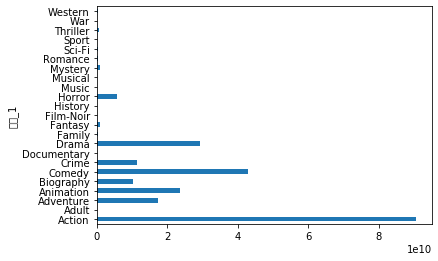

In [51]:
df.groupby('장르_1')['예산'].sum().plot(kind='barh') 
# 예산을 많이 쓴 장르 : 액션, 코메디, 드라마, 애니메이션, 어드벤쳐 순 

In [64]:
pip install wordcloud2

ERROR: Could not find a version that satisfies the requirement wordcloud2 (from versions: none)
ERROR: No matching distribution found for wordcloud2


In [0]:
list_of_genres = list(df['장르'])

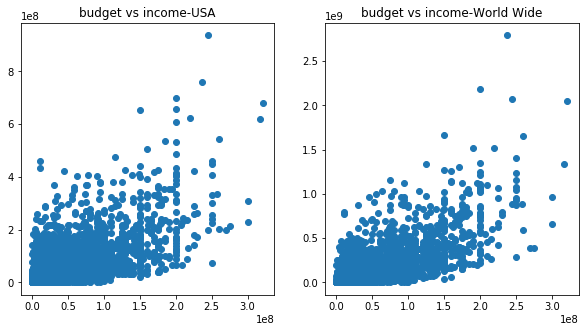

In [70]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['예산'], df['수익1-USA'])
plt.title('budget vs income-USA');
plt.subplot(1, 2, 2)
plt.scatter(df['예산'], df['수익2-WW'])
plt.title('budget vs income-World Wide');
# 예산과 수입의 상관관계

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


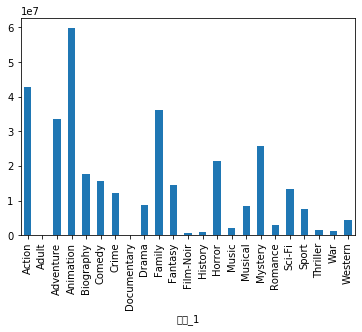

In [42]:
df.groupby('장르_1')['수익1-USA'].mean().plot(kind='bar')
# 미국에서 수익성이 가장 좋은 장르는

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


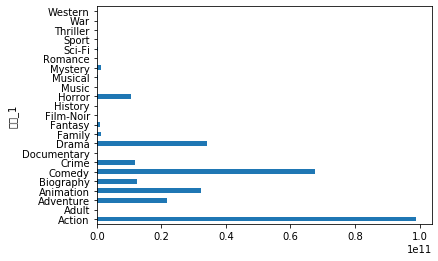

In [52]:
df.groupby('장르_1')['수익1-USA'].sum().plot(kind='barh')
# 미국에서 가장 수익성이 좋은 장르 : 액션,코메디,드라마 순 (애니메이션, 어드벤쳐, 크라임 순)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


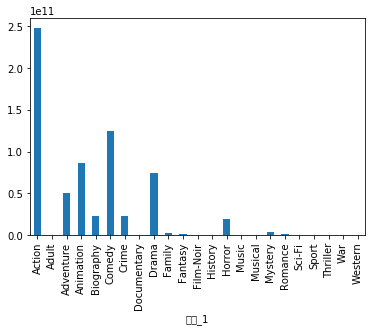

In [44]:
df.groupby('장르_1')['수익2-WW'].sum().plot(kind='bar')
# 전세계적으로 수익성 좋은 장르 : 액션, 코메디, 드라마 순

# 국가1만 추출해 분석해봄
1. ㅇㅇ
2. ㅇㅇ
3. ㅇㅇ

In [0]:
df['국가_1'] = df.국가.str.split(',').str[0]

In [46]:
df.head()

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,장르_1,국가_1
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",237000000.0,760507625.0,2.789968e+09,Action,USA
2,Titanic,1997,"Drama, Romance",USA,"English, Swedish, Italian",200000000.0,659363944.0,2.187464e+09,Drama,USA
3,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",USA,English,245000000.0,936662225.0,2.068224e+09,Action,USA
4,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",USA,English,321000000.0,678815482.0,2.048360e+09,Action,USA
5,Jurassic World,2015,"Action, Adventure, Sci-Fi",USA,English,150000000.0,652270625.0,1.670401e+09,Action,USA


# 언어1만 추출해 분석해봄
1. ㅇㅇ
2. ㅇㅇ
3. ㅇㅇ

In [0]:
df['언어_1'] = df.언어.str.split(',').str[0]

In [48]:
df.head()

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,장르_1,국가_1,언어_1
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",237000000.0,760507625.0,2.789968e+09,Action,USA,English
2,Titanic,1997,"Drama, Romance",USA,"English, Swedish, Italian",200000000.0,659363944.0,2.187464e+09,Drama,USA,English
3,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",USA,English,245000000.0,936662225.0,2.068224e+09,Action,USA,English
4,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",USA,English,321000000.0,678815482.0,2.048360e+09,Action,USA,English
5,Jurassic World,2015,"Action, Adventure, Sci-Fi",USA,English,150000000.0,652270625.0,1.670401e+09,Action,USA,English


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50616 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text

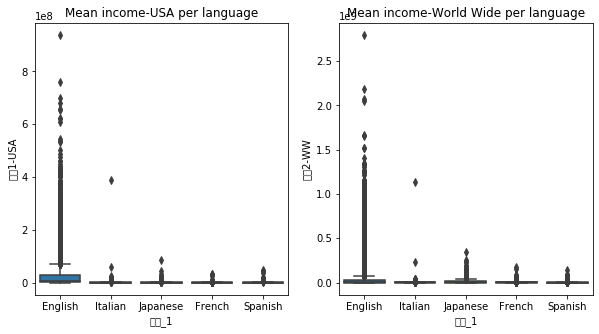

In [72]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='언어_1', y='수익1-USA', data=df.loc[df['언어_1'].isin(df['언어_1'].value_counts().head(5).index)]);
plt.title('Mean income-USA per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='언어_1', y='수익2-WW', data=df.loc[df['언어_1'].isin(df['언어_1'].value_counts().head(5).index)]);
plt.title('Mean income-World Wide per language');